# Preparación y carga de datos

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Opciones de visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (9,5)
RANDOM_STATE = 42


# Carga y checks iniciales

In [48]:
df = pd.read_csv('kick_chat_datasetV3.csv')
display(df.shape)
display(df.info())
display(df.isnull().sum())
display(df.head(6))
display(df.describe(include='all').T)


(2358, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             2357 non-null   float64
 1   username            2357 non-null   object 
 2   frequency           2358 non-null   float64
 3   avg_message_length  2358 non-null   float64
 4   total_messages      2358 non-null   int64  
 5   url_ratio           2358 non-null   float64
 6   repetition_ratio    2358 non-null   float64
 7   time_in_channel     2358 non-null   int64  
 8   suspicious_links    2358 non-null   int64  
 9   generic_name        2358 non-null   int64  
 10  username_length     2358 non-null   int64  
 11  has_numbers         2358 non-null   int64  
 12  has_underscore      2358 non-null   int64  
 13  numeric_ratio       2358 non-null   float64
 14  uppercase_ratio     2358 non-null   float64
 15  special_char_count  2358 non-null   int64  
 16  is_bot

None

user_id               1
username              1
frequency             0
avg_message_length    0
total_messages        0
url_ratio             0
repetition_ratio      0
time_in_channel       0
suspicious_links      0
generic_name          0
username_length       0
has_numbers           0
has_underscore        0
numeric_ratio         0
uppercase_ratio       0
special_char_count    0
is_bot                0
dtype: int64

,user_id,username,frequency,avg_message_length,total_messages,url_ratio,repetition_ratio,time_in_channel,suspicious_links,generic_name,username_length,has_numbers,has_underscore,numeric_ratio,uppercase_ratio,special_char_count,is_bot
0,10000160.0,Brunocas00,0.005952,44.000000,1,0.0,1.0,168,0,0,10,1,0,0.200000,0.100000,0,0
1,10002136.0,jonathan_606,1.000000,20.939394,33,0.0,6.6,33,0,0,12,1,1,0.250000,0.000000,1,1
2,10010230.0,YoelArlia,0.909091,19.800000,10,0.0,2.0,11,0,0,9,0,0,0.000000,0.222222,0,1
3,10023953.0,changito0,0.005155,14.000000,1,0.0,1.0,194,0,0,9,1,0,0.111111,0.000000,0,0
4,10030721.0,Iorenzoo,0.040000,18.000000,3,0.0,3.0,75,0,0,8,0,0,0.000000,0.125000,0,1
5,10046257.0,sebasguti08,0.014925,96.000000,1,1.0,1.0,67,0,0,11,1,0,0.181818,0.000000,0,1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,2357.0,NaN,NaN,NaN,41503185.149342,21883128.454297,8237.0,30908912.0,36414655.0,56998285.0,83610897.0
username,2357,2357,Brunocas00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frequency,2358.0,NaN,NaN,NaN,0.09072,0.422811,0.004167,0.009662,0.021739,0.054545,11.857143
avg_message_length,2358.0,NaN,NaN,NaN,24.114172,25.5587,1.0,16.274074,18.0,24.5,455.0
total_messages,2358.0,NaN,NaN,NaN,4.947837,9.896207,1.0,1.0,2.0,5.0,170.0
url_ratio,2358.0,NaN,NaN,NaN,0.011513,0.098706,0.0,0.0,0.0,0.0,1.0
repetition_ratio,2358.0,NaN,NaN,NaN,2.009591,4.365462,1.0,1.0,1.0,2.0,170.0
time_in_channel,2358.0,NaN,NaN,NaN,123.083969,67.405703,5.0,66.0,122.0,180.0,240.0
suspicious_links,2358.0,NaN,NaN,NaN,0.000424,0.020593,0.0,0.0,0.0,0.0,1.0
generic_name,2358.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Seleccion de los features a usar (numéricas y binarias) y limpieza de nulos mínimos

In [50]:
#  Features seleccionadas y limpieza mínima
features = [
    'frequency','avg_message_length','total_messages','url_ratio','repetition_ratio',
    'time_in_channel','numeric_ratio','uppercase_ratio','special_char_count','username_length',
    'suspicious_links','generic_name','has_numbers','has_underscore'
]

# Asegurar no nulos en features
X = df[features].copy().fillna(0)
y = df['is_bot'].astype(int).copy()

# Quick check de clases
display(y.value_counts(normalize=False))
display(y.value_counts(normalize=True))


is_bot
0    1901
1     457
Name: count, dtype: int64

is_bot
0    0.806192
1    0.193808
Name: proportion, dtype: float64

# Justificación de las etiquetas heurísticas
La columna is_bot fue creada aplicando la regla: usuario etiquetado como bot si cumple ≥3 de los 6 criterios definidos por la cátedra.

Conversión usada: 30 mensajes/hora = 0.5 mensajes/minuto.

In [52]:
# Contar criterios heurísticos por fila y verificar consistencia con is_bot
def count_heuristic_criteria(row):
    c = 0
    c += int(row['generic_name'] == 1)
    c += int(row['frequency'] > 0.5)                  # > 0.5 msg/min = > 30 msg/h
    c += int(row['repetition_ratio'] > 1.5)           # definición aplicada
    c += int(row['url_ratio'] > 0.5)
    c += int(row['suspicious_links'] == 1)
    c += int(row['avg_message_length'] < 30)
    return c

df['heuristic_count'] = df.apply(count_heuristic_criteria, axis=1)

# Crosstab: usuarios con heuristic_count >=3 vs etiqueta is_bot
display(pd.crosstab(df['heuristic_count']>=3, df['is_bot'], rownames=['heuristic≥3'], colnames=['is_bot']))

# Mostrar ejemplos representativos
examples_bots = df[df['is_bot']==1][['username','frequency','total_messages','repetition_ratio','url_ratio','suspicious_links','avg_message_length']].sample(6, random_state=RANDOM_STATE)
examples_humans = df[df['is_bot']==0][['username','frequency','total_messages','repetition_ratio','url_ratio','suspicious_links','avg_message_length']].sample(6, random_state=RANDOM_STATE)

display(examples_bots)
display(examples_humans)


is_bot,0,1
heuristic≥3,,
False,1901,408
True,0,49


,username,frequency,total_messages,repetition_ratio,url_ratio,suspicious_links,avg_message_length
1545,RenatalvsMatiasRecalt,0.208791,19,1.117647,0.736842,0,76.157895
216,Diegomontiel,0.381818,63,10.500000,0.571429,0,146.873016
1713,xinzortp,0.357143,10,5.000000,0.000000,0,19.400000
1161,kasaneru_666,0.026316,5,2.500000,0.000000,0,24.200000
847,diegooo_2006,0.128205,10,10.000000,0.000000,0,18.000000
1049,youandme1393,0.840909,37,37.000000,0.000000,0,18.000000


,username,frequency,total_messages,repetition_ratio,url_ratio,suspicious_links,avg_message_length
1520,Swagginhaze28,0.214286,3,1.5,0.0,0,5.000000
128,yorozuya12,0.014218,3,1.0,0.0,0,12.666667
682,nikorne_cz,0.017391,2,1.0,0.0,0,5.000000
648,LucaSan10,0.040000,2,2.0,0.0,0,18.000000
1630,jc_black7,0.029787,7,1.4,0.0,0,10.142857
1362,char_li_tos_07,0.011111,1,1.0,0.0,0,105.000000


# Distribuciones y correlación

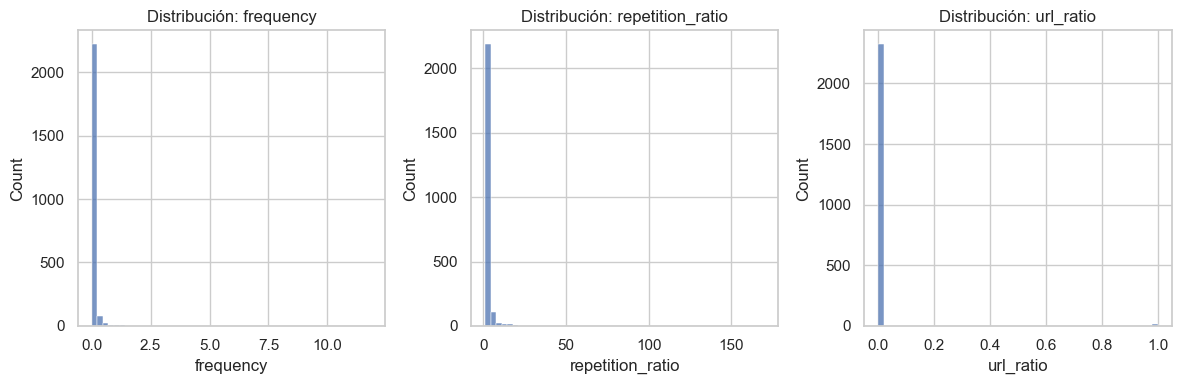

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['frequency'], bins=50, kde=False)
plt.title('Distribución: frequency')

plt.subplot(1,3,2)
sns.histplot(df['repetition_ratio'], bins=50, kde=False)
plt.title('Distribución: repetition_ratio')

plt.subplot(1,3,3)
sns.histplot(df['url_ratio'], bins=50, kde=False)
plt.title('Distribución: url_ratio')
plt.tight_layout()
plt.show()


# Correlación

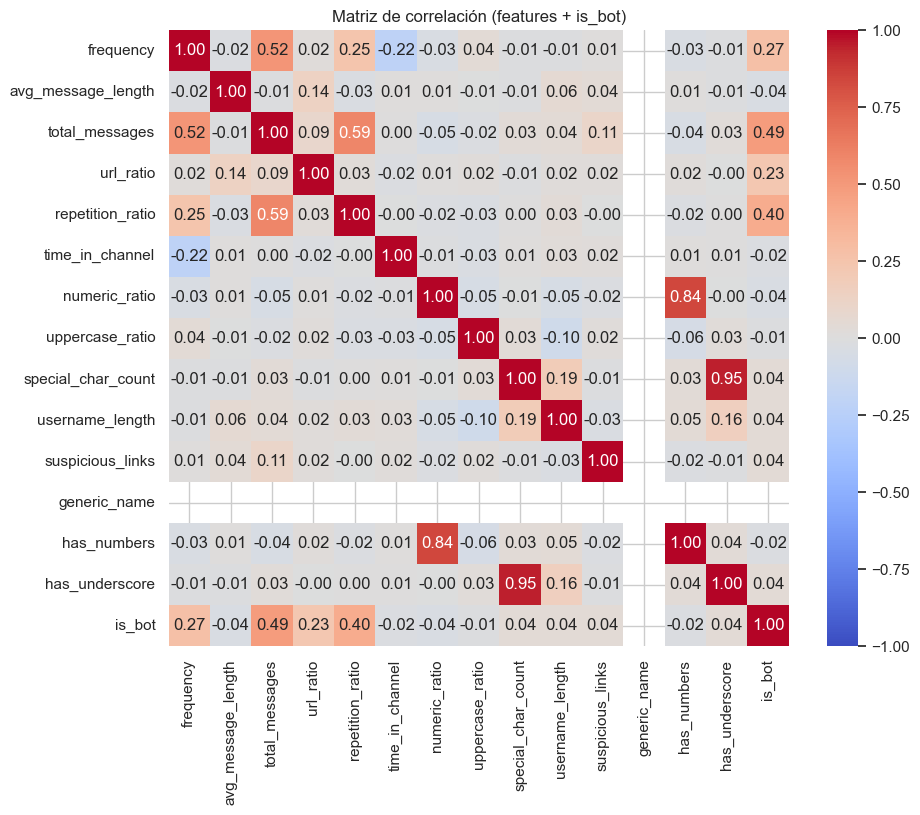

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features + ['is_bot']].corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación (features + is_bot)')
plt.show()


# Modelo supervisado Regresión Logística

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', solver='saga', max_iter=5000, random_state=RANDOM_STATE))
])

param_grid = {'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l2', 'l1']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
search = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1', n_jobs=-1)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Metricas

In [60]:
print("Mejores hiperparámetros:", search.best_params_)
print("\nClassification report (test):")
print(classification_report(y_test, y_pred))
print("ROC AUC (test):", roc_auc_score(y_test, y_proba))

Mejores hiperparámetros: {'clf__C': 0.1, 'clf__penalty': 'l1'}

Classification report (test):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       381
           1       0.99      0.96      0.97        91

    accuracy                           0.99       472
   macro avg       0.99      0.98      0.98       472
weighted avg       0.99      0.99      0.99       472

ROC AUC (test): 0.9991635660927001


# Matriz de confusión visual

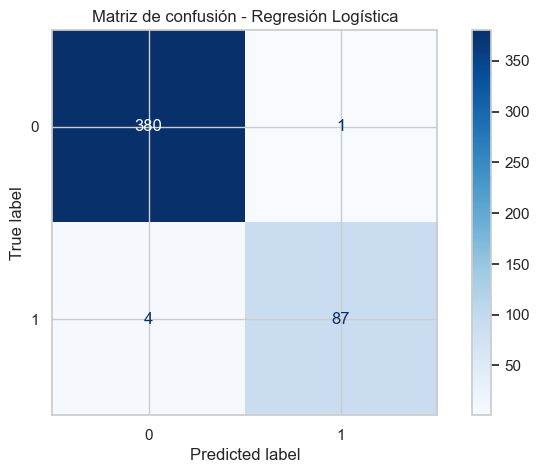

In [62]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['clf'].classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - Regresión Logística')
plt.show()

# Coeficientes interpretables (estandarizados por scaler)

In [64]:
coef = best_model.named_steps['clf'].coef_[0]
feat_coef = pd.Series(coef, index=features).sort_values(key=abs, ascending=False)
display(feat_coef)

repetition_ratio      9.993176
frequency             1.937067
total_messages        0.732090
url_ratio             0.639358
avg_message_length    0.000000
time_in_channel       0.000000
numeric_ratio         0.000000
uppercase_ratio       0.000000
special_char_count    0.000000
username_length       0.000000
suspicious_links      0.000000
generic_name          0.000000
has_numbers           0.000000
has_underscore        0.000000
dtype: float64

# Barplot coeficientes

C:\Users\agust\AppData\Local\Temp\ipykernel_9300\3603402176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_coef.values, y=feat_coef.index, palette='viridis')


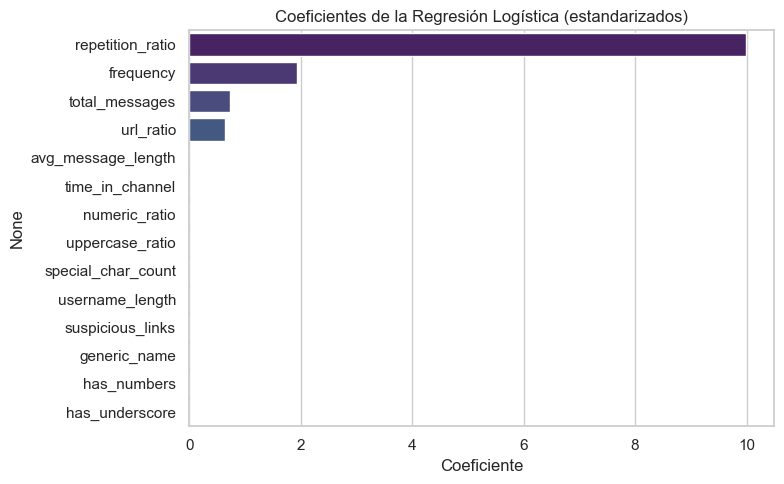

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x=feat_coef.values, y=feat_coef.index, palette='viridis')
plt.title('Coeficientes de la Regresión Logística (estandarizados)')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

# Validación con K Means no supervisado

In [68]:
# 8. KMeans validación (usar features seleccionadas)
km_features = ['frequency','repetition_ratio','url_ratio','suspicious_links','avg_message_length','generic_name']
X_km = df[km_features].fillna(0).copy()

scaler_km = StandardScaler()
X_km_scaled = scaler_km.fit_transform(X_km)

# PCA para visualización
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_km_scaled)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=10)
clusters = kmeans.fit_predict(X_km_scaled)
df['cluster'] = clusters

# Mapear cada cluster a la etiqueta dominante (0/1) para comparar
cluster_map = df.groupby('cluster')['is_bot'].mean().to_dict()
df['cluster_mapped_is_bot'] = df['cluster'].map(lambda c: 1 if cluster_map[c] > 0.5 else 0)

# Métricas de concordancia

In [70]:
ari = adjusted_rand_score(df['is_bot'], df['cluster'])
nmi = normalized_mutual_info_score(df['is_bot'], df['cluster'])
agreement_pct = (df['is_bot'] == df['cluster_mapped_is_bot']).mean()

print('Adjusted Rand Index (ARI):', ari)
print('Normalized Mutual Information (NMI):', nmi)
print('Porcentaje de coincidencia (heurística vs cluster_mapped):', agreement_pct)

Adjusted Rand Index (ARI): 0.002677292719585776
Normalized Mutual Information (NMI): 0.0028107910398958184
Porcentaje de coincidencia (heurística vs cluster_mapped): 0.806615776081425


# Matriz de confusión entre is_bot y cluster_mapped

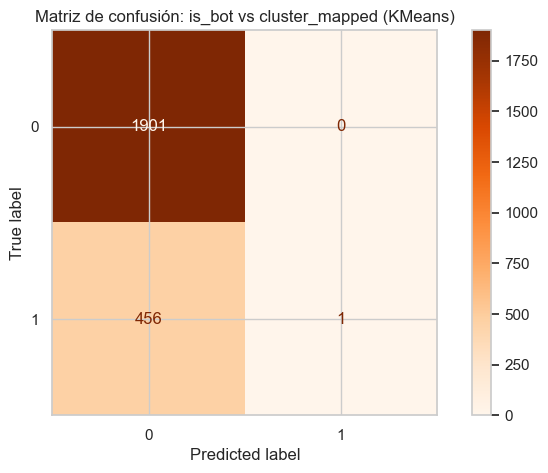

In [72]:
cm_k = confusion_matrix(df['is_bot'], df['cluster_mapped_is_bot'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_k, display_labels=[0,1])
disp.plot(cmap='Oranges')
plt.title('Matriz de confusión: is_bot vs cluster_mapped (KMeans)')
plt.show()

# Visualización PCA: por cluster y por is_bot

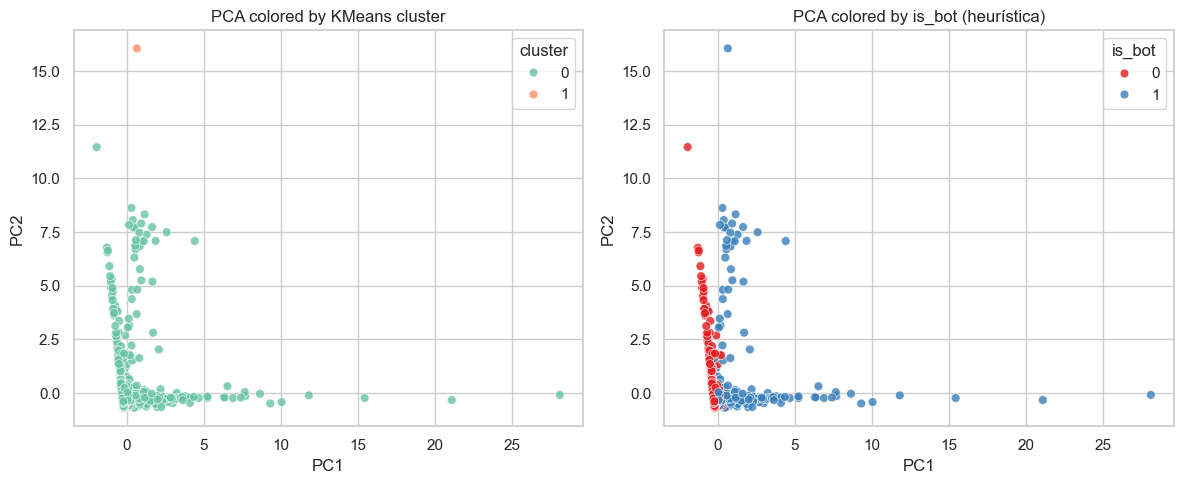

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2', s=40, alpha=0.8)
plt.title('PCA colored by KMeans cluster')
plt.xlabel('PC1'); plt.ylabel('PC2')

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['is_bot'], palette='Set1', s=40, alpha=0.8)
plt.title('PCA colored by is_bot (heurística)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.tight_layout()
plt.show()

In [ ]:
# Análisis comparativo y discrepancias

In [78]:
# 9. Diferencias de medias por cluster y por etiqueta heurística
diff_by_cluster = df.groupby('cluster')[km_features].mean().T
diff_by_label = df.groupby('is_bot')[km_features].mean().T
display(diff_by_cluster)
display(diff_by_label)

# Casos discrepantes entre la etiqueta heurística y el clustering mapeado
discrepancies = df[df['is_bot'] != df['cluster_mapped_is_bot']]
display(discrepancies[['username','frequency','total_messages','repetition_ratio','url_ratio','suspicious_links','avg_message_length','is_bot','cluster']].sample(12, random_state=RANDOM_STATE))

# Contar discrepancias
print("Total discrepancias:", discrepancies.shape[0], "de", df.shape[0])


cluster,0,1
frequency,0.090627,0.309783
repetition_ratio,2.009960,1.140000
url_ratio,0.011466,0.122807
suspicious_links,0.000000,1.000000
avg_message_length,24.093290,73.333333
generic_name,0.000000,0.000000


is_bot,0,1
frequency,0.033845,0.327305
repetition_ratio,1.155800,5.561134
url_ratio,0.000427,0.057627
suspicious_links,0.000000,0.002188
avg_message_length,24.568272,22.225235
generic_name,0.000000,0.000000


,username,frequency,total_messages,repetition_ratio,url_ratio,suspicious_links,avg_message_length,is_bot,cluster
1904,santiumaa,0.045161,7,3.500000,0.0,0,21.000000,1,0
220,Seeba_Leiva88,0.037313,5,2.500000,0.0,0,6.000000,1,0
1713,xinzortp,0.357143,10,5.000000,0.0,0,19.400000,1,0
1162,CWAR07,0.019355,3,3.000000,0.0,0,18.000000,1,0
850,Colorado144hz,0.066667,6,3.000000,0.0,0,18.666667,1,0
1050,El_PrimoOoO,0.051724,6,6.000000,0.0,0,18.000000,1,0
928,k4p03ir4,0.091954,16,5.333333,0.0,0,18.187500,1,0
520,raiders567,0.053846,7,2.333333,0.0,0,19.285714,1,0
2053,FerreiraFacu,0.034014,5,1.250000,0.4,0,40.000000,1,0
186,Jadinloyalty,0.026667,6,3.000000,0.0,0,19.166667,1,0


Total discrepancias: 456 de 2358
